# CVRP env test

+ 1. How to initialize the environment
+ 2. How to generate and load test dataset
+ 3. How to generate a batch of training data
+ 4. How to compute cost
+ 5. How to visualize the result

In [1]:
from xyq_env_vrp import CVRPProblem
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

----

## 1. How to initialize the environment

In [2]:
# build cvrp100 env
graph_size = 100
seed = 9527
cvrp_env = CVRPProblem(graph_size, seed)

In [3]:
# Check currently supported problems: graph_size - demand
cvrp_env.capacity_dict

{10: 20.0, 20: 30.0, 50: 40.0, 100: 50.0}

---
## 2. How to generate and load test dataset

Here I will generate 333 cvrp samples as testing dataset

In [4]:
# Generate and save a dataset for testing
filename = cvrp_env.generate_test_dataset(dataset_size=333)
print(filename)

Generate test dataset at: xyq_test_dataset/cvrp100_333_seed9527.pkl
xyq_test_dataset/cvrp100_333_seed9527.pkl


In [5]:
# Load dataset
test_dataset = cvrp_env.load_test_dataset(filename)

Dataset loaded, it's a length-333-list. During testing the batch_size is fixed as 1!
Sample data:
depot: (1, 2), float64
loc: (1, 100, 2), float64
demand: (1, 100), float64


In [6]:
test_dataset[100]

{'depot': array([[0.81112904, 0.48374296]]),
 'loc': array([[[0.24125392, 0.30504963],
         [0.92852417, 0.70221903],
         [0.69953593, 0.97037596],
         [0.03249648, 0.58078512],
         [0.17006658, 0.91345669],
         [0.61063087, 0.20677837],
         [0.94513874, 0.12120523],
         [0.80260254, 0.14940733],
         [0.22903008, 0.60373248],
         [0.45343995, 0.69909215],
         [0.15794689, 0.50036844],
         [0.37605053, 0.50171675],
         [0.06709543, 0.74941458],
         [0.09812562, 0.6245616 ],
         [0.0358365 , 0.48133451],
         [0.03524714, 0.02243279],
         [0.37903554, 0.99505647],
         [0.94468232, 0.24411983],
         [0.32118774, 0.64466179],
         [0.66311104, 0.7882984 ],
         [0.52883354, 0.1256229 ],
         [0.31336499, 0.74482713],
         [0.41567693, 0.19622581],
         [0.52105175, 0.93967354],
         [0.4453657 , 0.47890622],
         [0.88200774, 0.7349317 ],
         [0.37018509, 0.03378629],
   

---

## 3. How to generate a batch of training data

In [7]:
batch_size = 3
batch_data = cvrp_env.generate_vrp_data(batch_size)

In [8]:
print(batch_data.keys())

dict_keys(['depot', 'loc', 'demand'])


In [9]:
print(batch_data['depot'])
print(batch_data['depot'].shape)
print(batch_data['loc'].shape,batch_data['demand'].shape)

[[0.30694645 0.47351092]
 [0.60950616 0.26931764]
 [0.62732304 0.48588891]]
(3, 2)
(3, 100, 2) (3, 100)


In [10]:
# Demand for each node is integer in [1,9] scaled by capacity
print(batch_data['demand'])
print(batch_data['demand'].min() * 50, batch_data['demand'].max() * 50)

[[0.12 0.1  0.18 0.14 0.04 0.18 0.08 0.02 0.02 0.1  0.02 0.1  0.04 0.08
  0.1  0.06 0.16 0.06 0.16 0.14 0.08 0.02 0.02 0.16 0.1  0.14 0.04 0.06
  0.06 0.18 0.12 0.06 0.1  0.04 0.08 0.1  0.04 0.14 0.1  0.08 0.1  0.02
  0.12 0.1  0.18 0.16 0.16 0.14 0.08 0.02 0.12 0.02 0.12 0.1  0.08 0.02
  0.04 0.04 0.1  0.06 0.02 0.12 0.14 0.02 0.02 0.08 0.04 0.16 0.12 0.06
  0.16 0.08 0.14 0.14 0.06 0.12 0.16 0.16 0.08 0.08 0.08 0.14 0.08 0.16
  0.12 0.1  0.1  0.12 0.04 0.02 0.14 0.06 0.06 0.14 0.14 0.04 0.08 0.1
  0.1  0.08]
 [0.06 0.16 0.08 0.12 0.1  0.04 0.08 0.12 0.12 0.08 0.12 0.14 0.04 0.04
  0.16 0.14 0.18 0.16 0.16 0.06 0.12 0.12 0.16 0.1  0.16 0.14 0.16 0.06
  0.16 0.06 0.18 0.18 0.18 0.1  0.08 0.1  0.08 0.1  0.04 0.1  0.08 0.18
  0.12 0.06 0.02 0.02 0.16 0.16 0.1  0.04 0.04 0.02 0.18 0.14 0.18 0.02
  0.02 0.18 0.06 0.04 0.12 0.12 0.12 0.06 0.14 0.02 0.12 0.18 0.06 0.1
  0.06 0.18 0.04 0.16 0.14 0.16 0.16 0.12 0.1  0.16 0.02 0.18 0.16 0.08
  0.04 0.14 0.08 0.06 0.12 0.02 0.18 0.14 0.04 0.1  0

----

## 4. How to compute cost

In [11]:
# pretrained result
loc = np.array([[[0.0290, 0.4019],
         [0.2598, 0.3666],
         [0.0583, 0.7006],
         [0.0518, 0.4681],
         [0.6738, 0.3315],
         [0.7837, 0.5631],
         [0.7749, 0.8208],
         [0.2793, 0.6817],
         [0.2837, 0.6567],
         [0.2388, 0.7313],
         [0.6012, 0.3043],
         [0.2548, 0.6294],
         [0.9665, 0.7399],
         [0.4517, 0.4757],
         [0.7842, 0.1525],
         [0.6662, 0.3343],
         [0.7893, 0.3216],
         [0.5247, 0.6688],
         [0.8436, 0.4265],
         [0.9561, 0.0770],
         [0.4108, 0.0014],
         [0.5414, 0.6419],
         [0.2976, 0.7077],
         [0.4189, 0.0655],
         [0.8839, 0.8083],
         [0.7528, 0.8988],
         [0.6839, 0.7658],
         [0.9149, 0.3993],
         [0.1100, 0.2541],
         [0.4333, 0.4451],
         [0.4966, 0.7865],
         [0.6604, 0.1303],
         [0.3498, 0.3824],
         [0.8043, 0.3186],
         [0.2908, 0.4196],
         [0.3728, 0.3769],
         [0.0108, 0.9455],
         [0.7661, 0.2634],
         [0.1880, 0.5174],
         [0.7849, 0.1412],
         [0.3112, 0.7091],
         [0.1775, 0.4443],
         [0.1230, 0.9638],
         [0.7695, 0.0378],
         [0.2239, 0.6772],
         [0.5274, 0.6325],
         [0.0910, 0.2323],
         [0.7269, 0.1187],
         [0.3951, 0.7199],
         [0.7595, 0.5311],
         [0.6449, 0.7224],
         [0.4416, 0.3634],
         [0.8818, 0.9874],
         [0.7316, 0.2814],
         [0.0651, 0.0065],
         [0.5035, 0.3082],
         [0.3742, 0.4297],
         [0.9729, 0.9739],
         [0.4533, 0.3499],
         [0.7428, 0.4601],
         [0.0242, 0.6630],
         [0.9787, 0.1037],
         [0.3920, 0.6084],
         [0.0928, 0.0719],
         [0.8733, 0.3230],
         [0.7917, 0.5447],
         [0.6220, 0.1668],
         [0.3932, 0.8298],
         [0.7293, 0.3554],
         [0.5615, 0.8828],
         [0.0619, 0.8212],
         [0.3497, 0.3983],
         [0.7379, 0.0846],
         [0.4245, 0.9778],
         [0.6800, 0.3151],
         [0.3911, 0.8943],
         [0.6889, 0.8389],
         [0.1780, 0.6442],
         [0.5894, 0.5872],
         [0.9643, 0.7768],
         [0.8447, 0.7195],
         [0.7101, 0.4130],
         [0.0587, 0.0776],
         [0.1886, 0.1763],
         [0.7354, 0.6548],
         [0.3574, 0.1191],
         [0.9922, 0.8757],
         [0.7378, 0.9949],
         [0.2338, 0.2153],
         [0.2073, 0.4758],
         [0.0586, 0.8958],
         [0.5129, 0.7490],
         [0.2254, 0.4485],
         [0.5658, 0.3631],
         [0.9719, 0.2716],
         [0.6552, 0.1607],
         [0.4408, 0.3674],
         [0.7157, 0.8493],
         [0.6216, 0.4546],
         [0.3720, 0.8920]]])
depot = np.array([[0.4708, 0.5663]])
demand = np.array([[0.0800, 0.1600, 0.0600, 0.1800, 0.1800, 0.1600, 0.1600, 0.1400, 0.0600,
         0.1000, 0.1400, 0.0800, 0.1200, 0.1600, 0.0200, 0.0200, 0.0400, 0.1200,
         0.0800, 0.1200, 0.0800, 0.0400, 0.1200, 0.1600, 0.0400, 0.1800, 0.1200,
         0.1800, 0.0200, 0.0200, 0.1400, 0.0200, 0.0200, 0.1400, 0.1400, 0.0200,
         0.1600, 0.0800, 0.1600, 0.0400, 0.0200, 0.0400, 0.0800, 0.0200, 0.1000,
         0.0600, 0.0800, 0.1000, 0.1000, 0.0200, 0.1400, 0.0400, 0.1600, 0.1800,
         0.0600, 0.1200, 0.1400, 0.1000, 0.0200, 0.1400, 0.1400, 0.0600, 0.0400,
         0.0800, 0.1200, 0.0600, 0.1000, 0.0600, 0.0600, 0.0800, 0.0600, 0.1600,
         0.1200, 0.1800, 0.1800, 0.1200, 0.0600, 0.1600, 0.1000, 0.1600, 0.0800,
         0.1800, 0.1200, 0.0800, 0.0400, 0.1600, 0.1200, 0.1400, 0.1400, 0.1000,
         0.0600, 0.0800, 0.1000, 0.1600, 0.1000, 0.0800, 0.0800, 0.1200, 0.1800,
         0.1600]])
selected_idx = np.array([[ 56,  67,  96,  32,  48,  73,  44,  40,  15,  38,  54,  16,   0,  59,
          52,  97,  86,  24,  21,  55,  64,  83,  84,  36,  30,   0,  94,  11,
          75,   5,  69,  82,  79,   0,  14,  57,  72,  33,   2,  35,   0,  17,
          34,  20,  62,  95,  65,  28,  19,  60,   0,  89,  29,  47,   1,   4,
          42,  93,  90,  39,  12,   0,  99,  50,  66,   6,  81,  13,  80,  85,
          51,  22,   0,   9,  78,  61,   3,  71,  91,  37,  43,  10,  45,   0,
          27,   7,  25,  87,  58,  53,  88,  98,   0,  63,   8,  23,  41,  68,
         100,  76,  74,  70,  92,   0,  46,  77,  26,  31,  49,  18]]).astype(np.uint64)

In [12]:
inputs = {'depot':depot, 'loc':loc, 'demand':demand}

In [13]:
cost = cvrp_env.compute_cost(inputs, selected_idx)
print(cost, cost.shape)

[14.05645274] (1,)


-----

## 5. Visualize

Depot: (0.47,0.57)


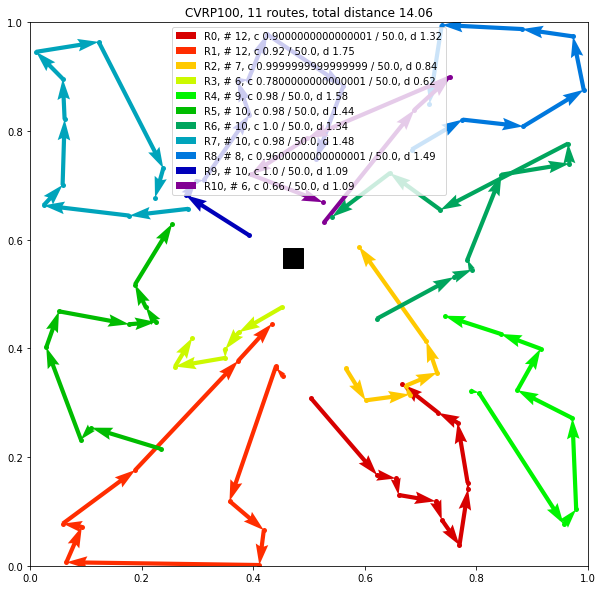

In [14]:
cvrp_env.plot_cvrp(inputs, selected_idx)

Depot: (0.47,0.57)


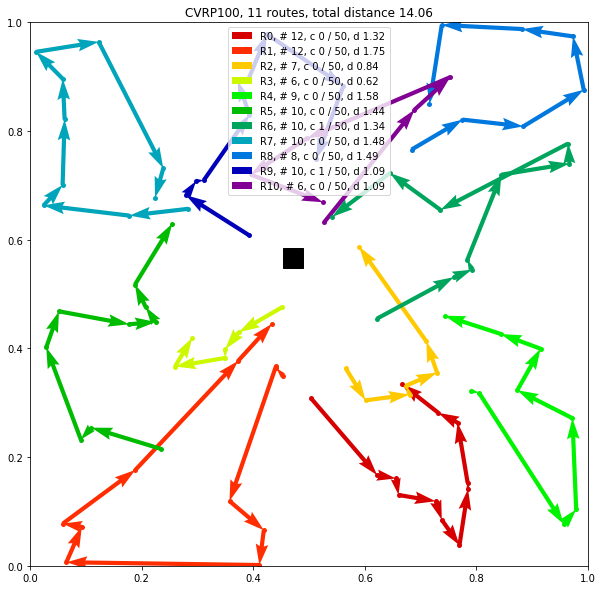

In [15]:
cvrp_env.plot_cvrp(inputs, selected_idx, round_demand=True)

Depot: (0.47,0.57)


/home/venturer/RL/20200316_AM_env/20200316_m123_env_tsp/problems/vrp/vrp_env/xyq_env_vrp.py:180: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().add_collection(pc_cap)
/home/venturer/RL/20200316_AM_env/20200316_m123_env_tsp/problems/vrp/vrp_env/xyq_env_vrp.py:181: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().add_collection(pc_used)
/home/venturer/RL/20200316_AM_env/20200316_m123_env_tsp/problems/vrp/vrp_env/

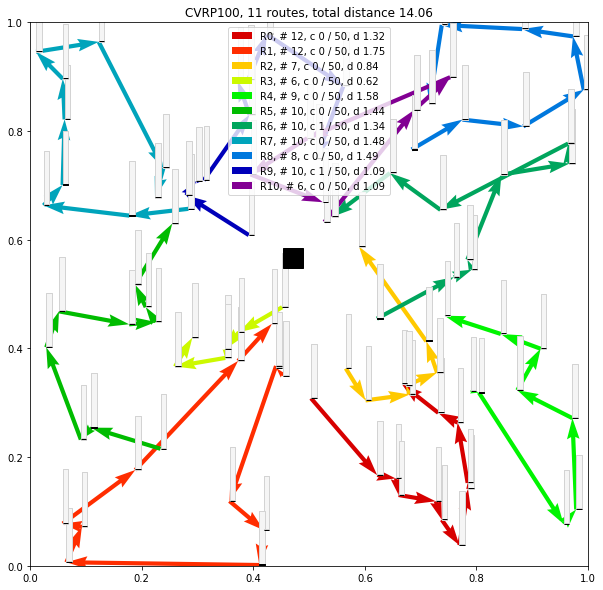

In [16]:
cvrp_env.plot_cvrp(inputs, selected_idx, round_demand=True, visualize_demands=True)